# Dogs vs. Cats Prediction Problem
* https://www.tensorflow.org/tutorials/images/cnn
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt

## Dataset

Download and prepare CIFAR 10 dataset

In [3]:
(train_images_i, train_labels_i), (test_images_i, test_labels_i) = datasets.cifar10.load_data()
train_images_i.shape, train_labels_i.shape, test_images_i.shape, test_labels_i.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Get the cats and dog images only

In [4]:
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
f = lambda x: 0 if x==3 else 1
def extract_model_data(images_i, labels_i):
    indices = np.where(np.logical_or(labels_i == 5, labels_i == 3))               
    return images_i[indices[0], :, :, :], np.array([f(xi) for xi in labels_i[indices]])

In [5]:
train_images, train_labels = extract_model_data(train_images_i, train_labels_i)

In [6]:
train_images.shape, train_labels.shape

((10000, 32, 32, 3), (10000,))

In [7]:
test_images, test_labels = extract_model_data(test_images_i, test_labels_i)

In [8]:
test_images.shape, test_labels.shape

((2000, 32, 32, 3), (2000,))

Verify the data

In [9]:
class_names = {0:'cat', 1:'dog'}

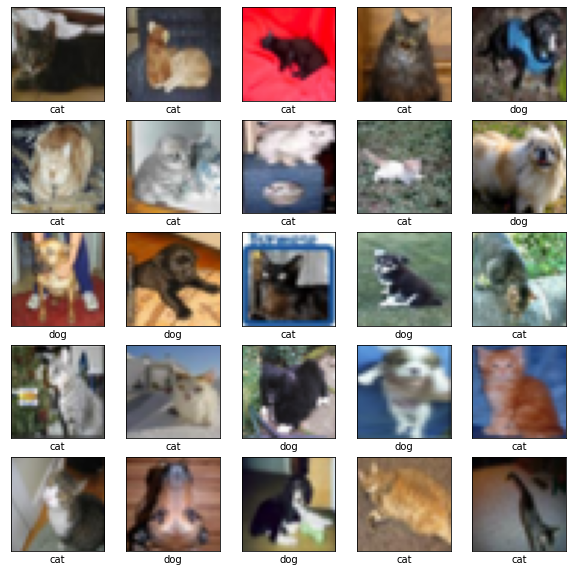

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Set the image data generator

In [11]:
datagen = ImageDataGenerator()

Prepare iterators (the folder "./tmp" should exist)

In [12]:
train_it = datagen.flow(train_images, train_labels, 
                        save_to_dir='./tmp', save_prefix='train',
                        batch_size=4, seed=1)
test_it = datagen.flow(test_images, test_labels,
                       save_to_dir='./tmp', save_prefix='test',
                       batch_size=4, seed=1)

Saving train dataset (will take time)

In [13]:
for _ in range(len(train_images)):
    next(train_it)

Saving test dataset (will take time)

In [14]:
for _ in range(len(test_images)):
    next(test_it)

Unofrtunately the names are not related to the data classes